Degree 2 Polynomial Regression:
Mean Squared Error (MSE): 14.158877893257824
R-squared (R²): 0.08420901754454779

Degree 3 Polynomial Regression:
Mean Squared Error (MSE): 21.1068426051264
R-squared (R²): -0.3651827688326632


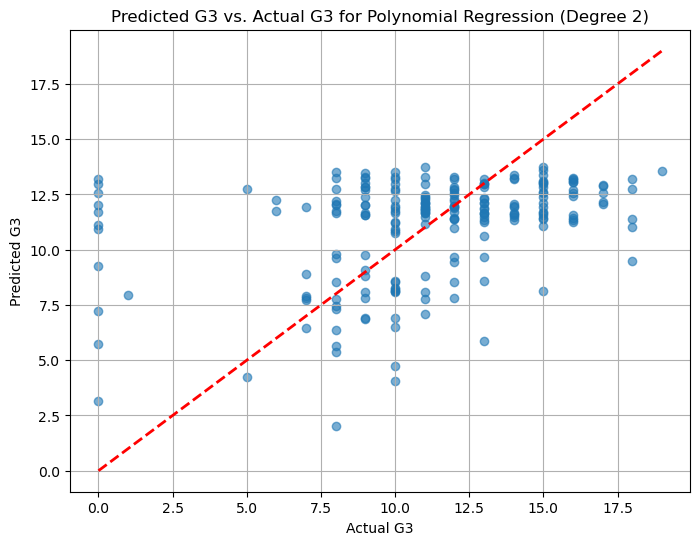

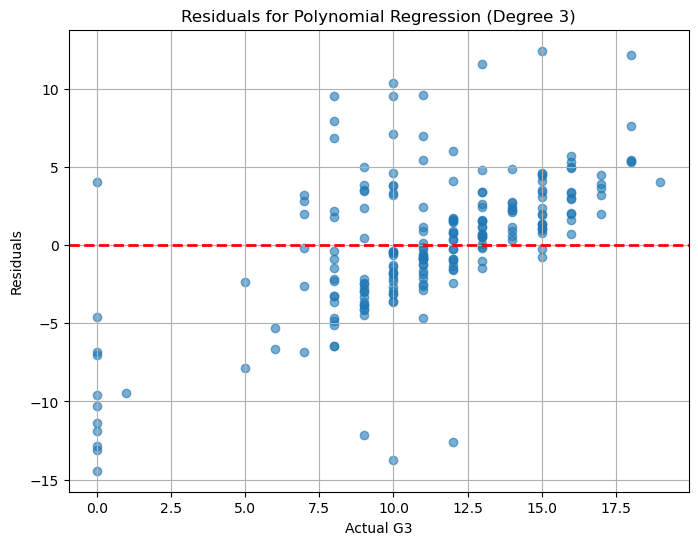

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the datasets
student_mat = pd.read_csv('student-mat.csv', delimiter=';')
student_por = pd.read_csv('student-por.csv', delimiter=';')

# Combine the datasets
student_data = pd.concat([student_mat, student_por], ignore_index=True)

# Select relevant features and encode categorical variables
features = ['failures', 'Medu', 'Fedu', 'higher', 'age', 'goout', 'romantic', 'traveltime']
target = 'G3'

# Encode categorical variables
student_data['higher_yes'] = student_data['higher'].map({'yes': 1, 'no': 0})
student_data['romantic_yes'] = student_data['romantic'].map({'yes': 1, 'no': 0})

# Updated feature list with encoded columns
selected_features = ['failures', 'Medu', 'Fedu', 'higher_yes', 'age', 'goout', 'romantic_yes', 'traveltime']

# Filter dataset for modeling
data = student_data[selected_features + [target]].dropna()

# Split into features (X) and target (y)
X = data[selected_features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression - Degree 2
poly_features_2 = PolynomialFeatures(degree=2)
X_train_poly_2 = poly_features_2.fit_transform(X_train)
X_test_poly_2 = poly_features_2.transform(X_test)

model_poly_2 = LinearRegression()
model_poly_2.fit(X_train_poly_2, y_train)

y_pred_poly_2 = model_poly_2.predict(X_test_poly_2)

# Evaluate the model for Degree 2 Polynomial
mse_poly_2 = mean_squared_error(y_test, y_pred_poly_2)
r2_poly_2 = r2_score(y_test, y_pred_poly_2)

print("Degree 2 Polynomial Regression:")
print("Mean Squared Error (MSE):", mse_poly_2)
print("R-squared (R²):", r2_poly_2)
print()

# Polynomial Regression - Degree 3
poly_features_3 = PolynomialFeatures(degree=3)
X_train_poly_3 = poly_features_3.fit_transform(X_train)
X_test_poly_3 = poly_features_3.transform(X_test)

model_poly_3 = LinearRegression()
model_poly_3.fit(X_train_poly_3, y_train)

y_pred_poly_3 = model_poly_3.predict(X_test_poly_3)

# Evaluate the model for Degree 3 Polynomial
mse_poly_3 = mean_squared_error(y_test, y_pred_poly_3)
r2_poly_3 = r2_score(y_test, y_pred_poly_3)

print("Degree 3 Polynomial Regression:")
print("Mean Squared Error (MSE):", mse_poly_3)
print("R-squared (R²):", r2_poly_3)

# Plot Predicted vs Actual for Degree 2 Polynomial Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly_2, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Ideal fit line y=x
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Predicted G3 vs. Actual G3 for Polynomial Regression (Degree 2)')
plt.grid(True)
plt.show()

# Calculate Residuals for Degree 3 Polynomial Regression
residuals_poly_3 = y_test - y_pred_poly_3

# Plot Residuals for Degree 3 Polynomial Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_poly_3, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual G3')
plt.ylabel('Residuals')
plt.title('Residuals for Polynomial Regression (Degree 3)')
plt.grid(True)
plt.show()

